# Food detection by YOLO

## Build Yolov4

In [2]:
!pwd

/home/jupyter/food-detection


In [4]:
# clone darknet repo
# !git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13567 (delta 1), reused 1 (delta 0), pack-reused 13559
Receiving objects: 100% (13567/13567), 12.20 MiB | 5.37 MiB/s, done.
Resolving deltas: 100% (9256/9256), done.


In [ ]:
./ darknet detector train

In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/home/jupyter/food-detection/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [8]:
# make darknet (build)
# !make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
Package opencv was not found in the pkg-config search path.
Perhaps you should add the directory containing `opencv.pc'
to the PKG_CONFIG_PATH environment variable
No package 'opencv' found
./src/image_opencv.cpp:16:36: fatal error: opencv2/core/version.hpp: No such file or directory
 #include <opencv2/core/version.hpp>
                                    ^
compilation terminated.
Makefile:165: recipe for target 'obj/image_opencv.o' failed
make: *** [obj/image_opencv.o] Error 1


# Initial project

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


print(tf.__version__)

AttributeError: module 'tensorflow' has no attribute '__version__'

In [9]:
import shutil # copy, move file
import os # miscellaneous operation system interfaces
import pathlib

In [10]:
import cv2
import numpy as np
import pandas as pd
import string
import time
import json

# import padding library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

ModuleNotFoundError: No module named 'tensorflow.keras.preprocessing'; 'tensorflow.keras' is not a package

In [ ]:
%cd /home/jupyter/food-detection

In [18]:
# finding where we are so we dont need to type absolute path everytime
current_directory_path = pathlib.Path(".").absolute()
current_directory_path

PosixPath('/home/jupyter/food-detection')

# Define a helper function 

In [15]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Gathering and Labeling from OpenImageV6

In [11]:
%cd /home/jupyter/food-detection/darknet/

/home/jupyter/food-detection/darknet


In [12]:
!pwd

/home/jupyter/food-detection/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 4.9.1
Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image dat

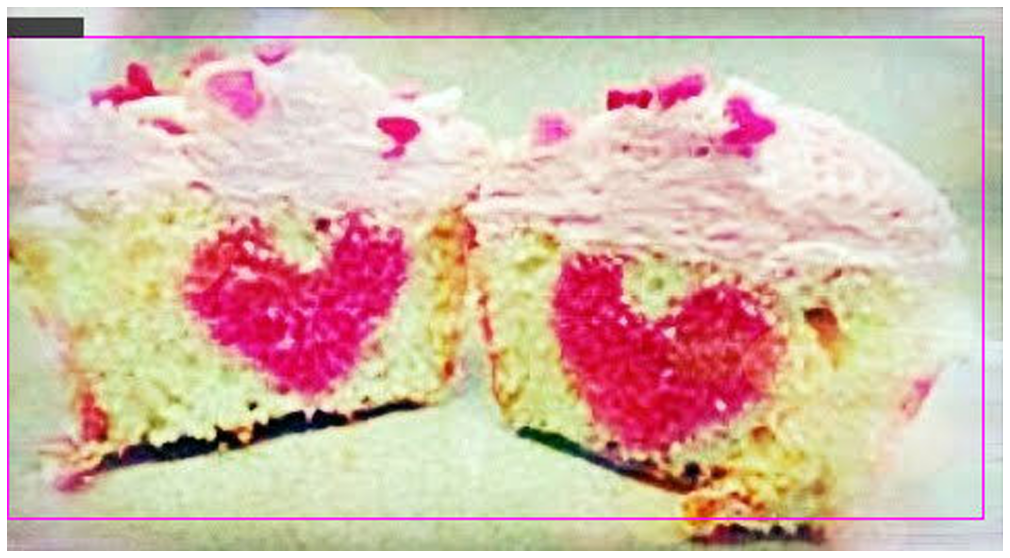

In [29]:
!./darknet detector test data/obj.data cfg/yolov4-mycustom-test.cfg backup/yolov4-mycustom_final.weights /home/jupyter/food-detection/recipe1M/test/0/0/0/0/000044c2db.jpg -thresh 0.3 -dont_show
imShow('predictions.jpg')

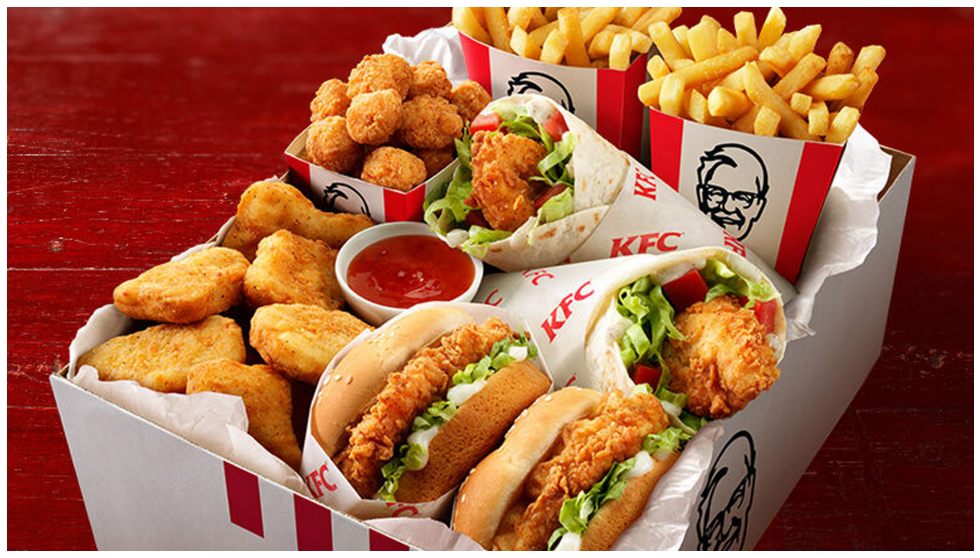

In [27]:
imShow('predictions.jpg')